## Lấy điểm max mỗi môn từ điểm của từng students trong 1 team

### Case 1 : Điểm 0-1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [2]:
k = 5
P = np.array([[1,1,1,1,1,0,0,0,0,0],
             [1,0,1,1,1,0,0,0,0,0],
             [0,0,0,0,1,1,1,0,0,1],
             [0,0,0,0,0,0,0,0,1,1],
             [0,0,0,0,0,0,0,0,1,1]])

In [3]:
P

array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]])

In [4]:
def objective_max_score(x):
    # input : [] list team index, output team max score 
    return P[x,:].max(axis=0, keepdims=1)

In [5]:
def cosine_sim(v1,v2):
    return np.dot(v1,v2)/(np.linalg.norm(v1) * np.linalg.norm(v2))

In [6]:
E = np.array([1,1,1,1,1,1,1,1,1,1])

In [7]:
objective_max_score([0,2,3]).sum()

9

In [8]:
objective_max_score([1,2,3]).sum()

8

In [9]:
team = []
obj_score = []
for first in range(k-2):
    for(second) in range(first+1,k-1):
        for(last) in range(second+1,k):
            team.append([first,second,last])
            obj_score.append(objective_max_score([first,second,last]).sum())

In [10]:
obj_score

[8, 7, 7, 9, 9, 7, 8, 8, 6, 5]

In [16]:
print("Team #3 :",team[3]," with performance : ",objective_max_score(team[3]), " has total score : ",obj_score[3])

Team #3 : [0, 2, 3]  with performance :  [[1 1 1 1 1 1 1 0 1 1]]  has total score :  9


In [15]:
print("Team #4 :",team[4]," with performance : ",objective_max_score(team[4])," has total score : ",obj_score[4])

Team #4 : [0, 2, 4]  with performance :  [[1 1 1 1 1 1 1 0 1 1]]  has total score :  9


### Case 2 : Điểm 0-10

5 students, 10 problem types, 10 problems each type

In [17]:
k = 5
n = 10
m = 10

In [18]:
P = np.random.randint(low =0, high=11, size=[k,m])

In [19]:
P

array([[ 8,  2,  2,  1,  7, 10, 10,  5,  3,  5],
       [ 3, 10,  0,  4,  3,  4,  7,  3,  3,  9],
       [ 2,  9,  1,  2,  2,  0,  8,  0,  8,  9],
       [10,  9,  7,  4,  9,  2,  7,  2,  7,  0],
       [ 8,  7,  5,  4,  1,  9,  1,  5,  6,  0]])

In [36]:
team = []
obj_score = []
sum_score = []
for first in range(k-2):
    for(second) in range(first+1,k-1):
        for(last) in range(second+1,k):
            team.append([first,second,last]) # danh sách team
            obj_score.append(objective_max_score([first,second,last]).sum()) # tổng điểm max của team
            sum_score.append(P[[first,second,last],:].sum()) # tổng điểm của team

In [37]:
obj_score

[73, 81, 74, 81, 75, 76, 72, 69, 77, 78]

In [38]:
sum_score

[140, 156, 145, 151, 140, 156, 144, 133, 149, 144]

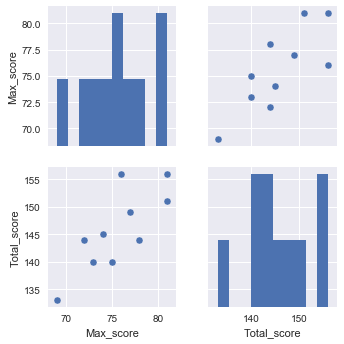

In [42]:
import pandas as pd

data = pd.DataFrame(
    {
        'Max_score' : obj_score,
        'Total_score' : sum_score
    }
)

sns.pairplot(data=data)

In [33]:
print("Team #1 :",team[1]," with performance of each students : \n",P[team[1],:],"\nAnd performance max of team : ",objective_max_score(team[1]))

Team #1 : [0, 1, 3]  with performance of each students : 
 [[ 8  2  2  1  7 10 10  5  3  5]
 [ 3 10  0  4  3  4  7  3  3  9]
 [10  9  7  4  9  2  7  2  7  0]] 
And performance max of team :  [[10 10  7  4  9 10 10  5  7  9]]


In [34]:
print("Team #3 :",team[3]," with performance of each students : \n",P[team[3],:],"\nAnd performance max of team : ",objective_max_score(team[1]))

Team #3 : [0, 2, 3]  with performance of each students : 
 [[ 8  2  2  1  7 10 10  5  3  5]
 [ 2  9  1  2  2  0  8  0  8  9]
 [10  9  7  4  9  2  7  2  7  0]] 
And performance max of team :  [[10 10  7  4  9 10 10  5  7  9]]


In [35]:
print("Team #5 :",team[5]," with performance of each students : \n",P[team[5],:],"\nAnd performance max of team : ",objective_max_score(team[5]))

Team #5 : [0, 3, 4]  with performance of each students : 
 [[ 8  2  2  1  7 10 10  5  3  5]
 [10  9  7  4  9  2  7  2  7  0]
 [ 8  7  5  4  1  9  1  5  6  0]] 
And performance max of team :  [[10  9  7  4  9 10 10  5  7  5]]


Team #5 có điểm tổng cao nhất, tuy vậy điểm max thấp hơn team #1 và #3 do kết quả ở problem type cuối thấp hơn

### Thử với mean reduced : Giảm điểm của team có điểm thấp hơn trung bình

In [45]:
# điểm trung bình của tất cả : 
AVG = np.average(P, axis=0)

In [46]:
AVG

array([ 6.2,  7.4,  3. ,  3. ,  4.4,  5. ,  6.6,  3. ,  5.4,  4.6])

In [58]:
def mean_reduced_score(a_team):
    team_mean = np.mean(P[a_team,:],axis=0)
    under = team_mean < AVG # trả về vector [0..1..] với x_i= 1 nếu team_mean[i] < avg[i]
    diff = np.multiply(team_mean - AVG,under)
    return team_mean.sum() - np.sum(np.multiply(diff,diff))/100

In [59]:
mean_reduced = [] 
for a_team in team:
    mean_reduced.append(mean_reduced_score([a_team]))

In [60]:
mean_reduced

[138.69720000000001,
 155.00960000000001,
 143.6788,
 149.6652,
 138.33439999999999,
 154.64680000000001,
 142.78479999999999,
 131.45400000000001,
 147.7664,
 142.422]

Team #1 là team đồng đều & có kết quả cao nhất 

### Thử lại với data mới 

In [66]:
P = np.random.randint(low =0, high=11, size=[k,m])
P

array([[ 6,  1,  1,  9,  7,  6,  5,  2,  0,  3],
       [ 3,  2,  0,  5,  1,  5,  6,  4, 10,  2],
       [ 0, 10,  7,  7,  8, 10,  5,  8,  4,  5],
       [ 3,  3,  4,  8,  8,  6, 10,  8,  9,  7],
       [ 8, 10,  7,  9,  8,  3, 10,  3,  3,  8]])

In [67]:
team = []
obj_score = []
sum_score = []
mean_reduced = [] 
for first in range(k-2):
    for(second) in range(first+1,k-1):
        for(last) in range(second+1,k):
            team.append([first,second,last]) # danh sách team
            obj_score.append(objective_max_score([first,second,last]).sum()) # tổng điểm max của team
            sum_score.append(P[[first,second,last],:].sum()) # tổng điểm của team
            mean_reduced.append(mean_reduced_score([first,second,last]))

In [68]:
obj_score

[79, 71, 80, 84, 82, 83, 81, 88, 84, 87]

In [69]:
sum_score

[142, 144, 147, 170, 173, 175, 168, 171, 173, 199]

In [70]:
mean_reduced

[47.098311111111109,
 47.638622222222232,
 48.88880000000001,
 56.47817777777778,
 57.547511111111113,
 58.236177777777783,
 55.765999999999998,
 56.93577777777778,
 57.584444444444451,
 66.269111111111116]

In [80]:
print(team[9]," has highest sum score and mean_reduced score")
print(P[team[9],:]) # highest sum score and mean_reduced score

[2, 3, 4]  has highest sum score and mean_reduced score
[[ 0 10  7  7  8 10  5  8  4  5]
 [ 3  3  4  8  8  6 10  8  9  7]
 [ 8 10  7  9  8  3 10  3  3  8]]


In [81]:
objective_max_score(team[9])

array([[ 8, 10,  7,  9,  8, 10, 10,  8,  9,  8]])

In [84]:
print(team[7], " has highest max_score")
P[team[7],:]# highest max_score 

[1, 2, 4]  has highest max_score


array([[ 3,  2,  0,  5,  1,  5,  6,  4, 10,  2],
       [ 0, 10,  7,  7,  8, 10,  5,  8,  4,  5],
       [ 8, 10,  7,  9,  8,  3, 10,  3,  3,  8]])

In [83]:
objective_max_score(team[7])

array([[ 8, 10,  7,  9,  8, 10, 10,  8, 10,  8]])

In [86]:
print("Student 1 : ",P[1,:],"\nStudent 3 : ",P[3,:])

Student 1 :  [ 3  2  0  5  1  5  6  4 10  2] 
Student 3 :  [ 3  3  4  8  8  6 10  8  9  7]


3 students nên chọn là  2 3 4